In [1]:
% pylab inline
import os
import random

import pandas as pd
from scipy.misc import imread

Populating the interactive namespace from numpy and matplotlib


In [2]:
root_dir = os.path.abspath('.')
data_dir_train = 'data/train_DETg9GD'
data_dir_test = 'data/test_Bh8pGW3'

train = pd.read_csv(os.path.join(data_dir_train, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir_test, 'test.csv'))

In [3]:
i = random.choice(train.index)

img_name = train.ID[i]
img = imread(os.path.join(data_dir_train, 'Train', img_name))

print('Age: ', train.Class[i])

('Age: ', 'OLD')


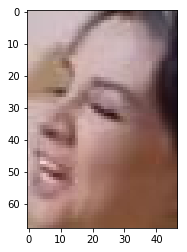

In [4]:
imshow(img)

In [5]:
from scipy.misc import imresize

In [6]:
temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir_train, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

In [7]:
train_x = np.stack(temp)

In [8]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir_test, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

In [9]:
test_x = np.stack(temp)

In [10]:
train_x = train_x / 255
test_x = test_x / 255

In [11]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [12]:
test['Class'] = 'MIDDLE'
test.to_csv('sub01.csv', index=False)

In [14]:
import keras
from sklearn.preprocessing import LabelEncoder

In [15]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [107]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 20
batch_size = 128

In [108]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [109]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dense_26 (Dense)             (None, 200)               100200    
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 603       
Total params: 1,637,303
Trainable params: 1,637,303
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
19906/19906 [==============================] - 6s 326us/step - loss: 0.9960 - acc: 0.5427
Epoch 2/20
19906/19906 [==============================] - 6s 289us/step - loss: 0.9789 - acc: 0.5428
Epoch 3/20
19906/19906 [==============================] - 6s 291us/step - loss: 0.9625 - acc: 0.5428
Epoch 4/20
19906/19906 [==============================] - 6s 296us/step - loss: 0.9627 - acc: 0.5428
Epoch 5/20
19906/19906 [==============================] - 6s 324us/step - loss: 0.9614 - acc: 0.5428 1s - loss
Epoch 6/20
19906/19906 [==============================] - 6s 296us/step - loss: 0.9560 - acc: 0.5428
Epoch 7/20
19906/19906 [==============================] - 6s 296us/step - loss: 0.9543 - acc: 0.5428
Epoch 8/20
19906/19906 [==============================] - 6s 299us/step - loss: 0.9536 - acc: 0.5428
Epoch 9/20
19906/19906 [==============================] - 6s 299us/step - loss: 0.9534 - acc: 0.5428
Epoch 10/20
19906/19906 [==============================] - 6s 300us/step - loss: 

In [91]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/20
15924/15924 [==============================] - 6s 355us/step - loss: 0.4224 - acc: 0.8289 - val_loss: 0.5533 - val_acc: 0.7690
Epoch 2/20
15924/15924 [==============================] - 6s 347us/step - loss: 0.4203 - acc: 0.8293 - val_loss: 0.5855 - val_acc: 0.7539
Epoch 3/20
15924/15924 [==============================] - 5s 345us/step - loss: 0.4195 - acc: 0.8303 - val_loss: 0.5978 - val_acc: 0.7511
Epoch 4/20
15924/15924 [==============================] - 5s 336us/step - loss: 0.4162 - acc: 0.8320 - val_loss: 0.5821 - val_acc: 0.7572
Epoch 5/20
15924/15924 [==============================] - 6s 377us/step - loss: 0.4143 - acc: 0.8339 - val_loss: 0.6143 - val_acc: 0.7461
Epoch 6/20
15924/15924 [==============================] - 6s 367us/step - loss: 0.4139 - acc: 0.8331 - val_loss: 0.6000 - val_acc: 0.7564
Epoch 7/20
15924/15924 [==============================] - 6s 379us/step - loss: 0.4122 - acc: 0.8341 - val_loss: 0.5630 - v

In [92]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv('sub11.csv', index=False)

('Original:', 'MIDDLE', 'Predicted:', 'MIDDLE')


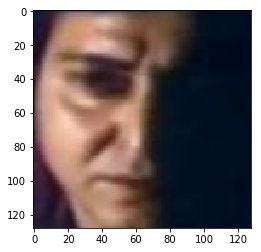

In [93]:
i = random.choice(train.index)
img_name = train.ID[i]

img = imread(os.path.join(data_dir_train, 'Train', img_name)).astype('float32')
imshow(imresize(img, (128, 128)))
pred = model.predict_classes(train_x)
print('Original:', train.Class[i], 'Predicted:', lb.inverse_transform(pred[i]))